In [1]:
import os

import pandas as pd

import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import abline_plot

import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [3]:
path = '/Users/alvastrand/Downloads/'

os.chdir(path)

In [4]:
os.getcwd()

'/Users/alvastrand/Downloads'

In [5]:
pd.set_option('max_columns', 100)

pd.set_option('max_rows', 100)

In [6]:
def my_function(species, model_type):

    path_to_file = species + '_both_' + model_type + '_ArrivalDate/'

    filename = 'data_arrival.csv'

    df = pd.read_csv(path_to_file + filename)

    print(len(df))

    df = df[df['valid_GAM'] == True]

    print(len(df))

    # df['year']

    cells = sorted(list(df['cell'].unique()))

    cells_considered = []
    slopes = []
    intercepts = []
    r_squared = []
    p_values = []

    for cell in cells:

    #     print(cell)

        df_subset = df[df['cell'] == cell]

    #     print(len(df_subset))

        if len(df_subset['year'].unique()) < 5: # or if len(df_subset) < 5

            continue

        model = smf.ols(formula='posterior_mean ~ year', data=df_subset)

        res = model.fit()

    #     ax = df_subset.plot(x='year', y='posterior_mean', kind='scatter')

    #     abline_plot(model_results=res, ax=ax)

    #     print(res.params[1])
    #     print(res.params[0])
    #     print(res.rsquared)
    #     print(res.pvalues[1])

        cells_considered.append(cell)
        slopes.append(res.params[1])
        intercepts.append(res.params[0])
        r_squared.append(res.rsquared)
        p_values.append(res.pvalues[1])

    df_ols = pd.DataFrame(data={'cell': cells_considered, 'slope': slopes, 'intercept': intercepts, 
                                'r_squared': r_squared, 'p_value': p_values})

    print(len(df_ols))

    df_ols['slope'].hist()
    
    plt.title('Distribution of the slopes of the OLS regressions of the ' + model_type + ' estimates over year')

    plt.show()
    
    # list_column_names = ['slope', 'intercept', 'r_squared', 'p_value']

    # df_ols_gam[list_column_names] = df_ols_gam[list_column_names].add_suffix('_GAM')

    # df_ols_iar[list_column_names] = df_ols_gam[list_column_names].add_suffix('_IAR')

    df_ols = df_ols.add_suffix('_' + model_type)

    df_ols = df_ols.rename(columns={'cell_' + model_type: 'cell'})

    return df, df_ols

BarnSwallow
1376
529
49


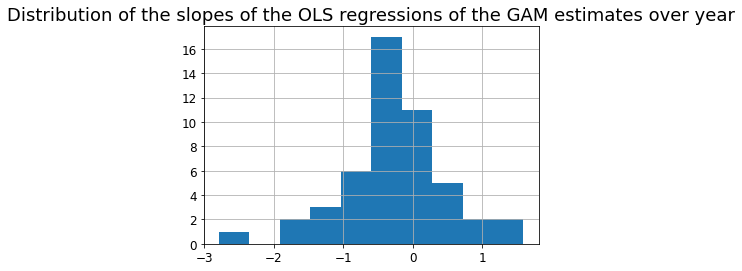

1376
529
49


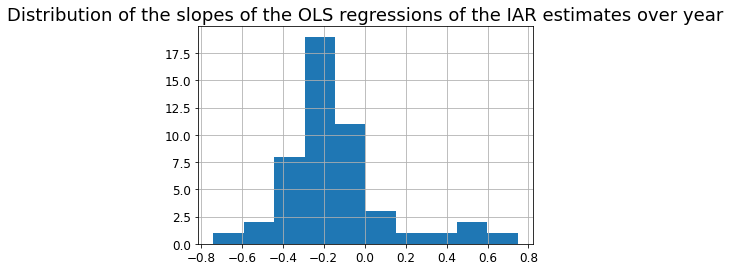

49
-3.008067115768457
1.8098285928143723


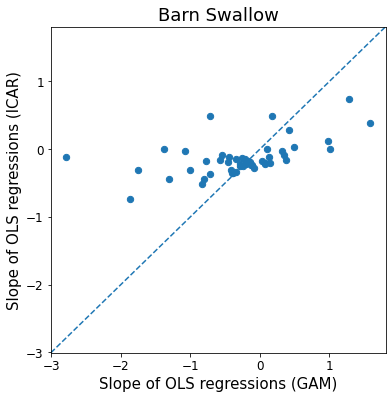

CliffSwallow
1312
201
19


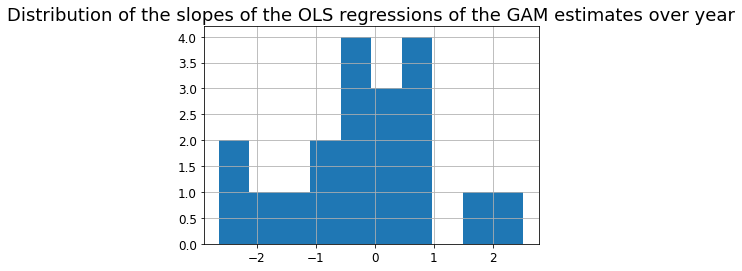

1312
201
19


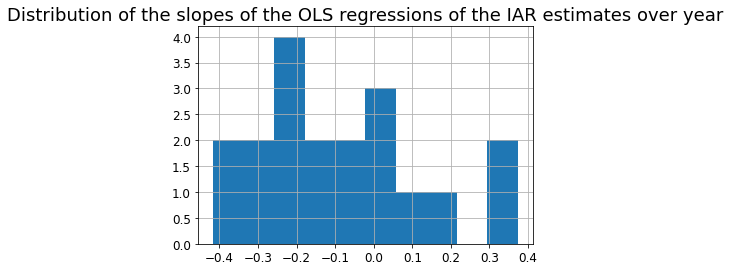

19
-2.8958519475542475
2.7761433258233468


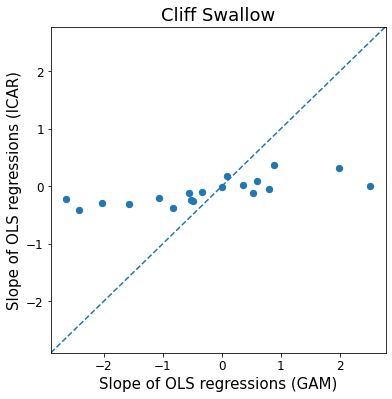

NorthernRough-wingedSwallow
912
430
41


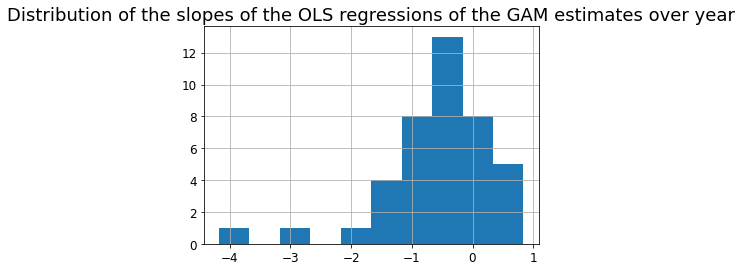

912
430
41


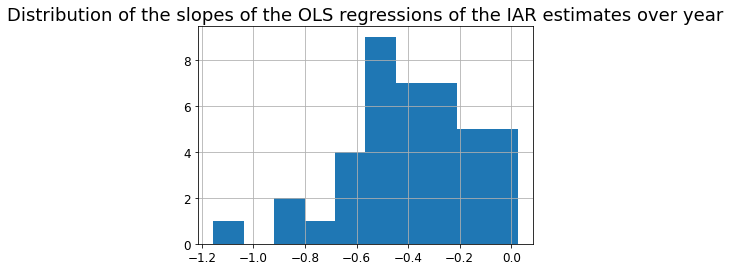

41
-4.425637878788488
1.088395454545306


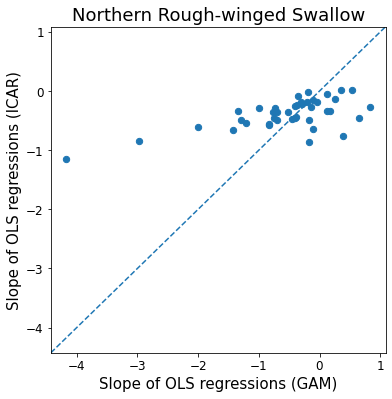

TreeSwallow
1424
483
41


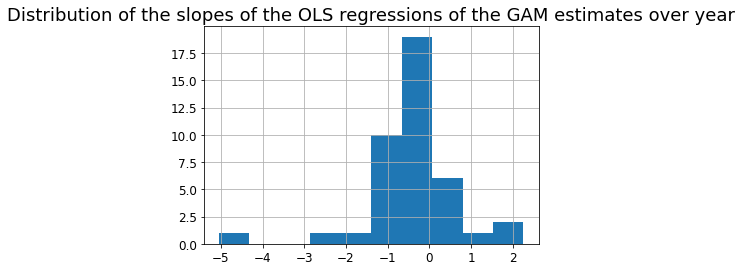

1424
483
41


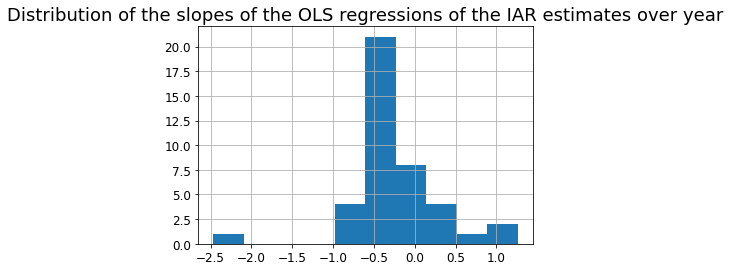

41
-5.410871428570291
2.616299999999998


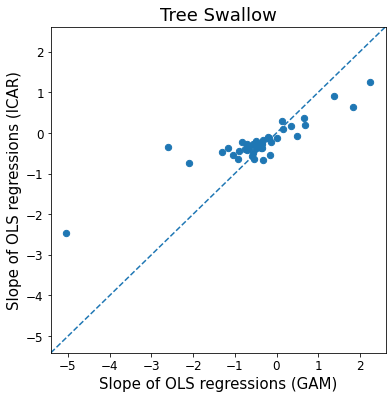

In [10]:
list_species = ['BarnSwallow', 'CliffSwallow', 'NorthernRough-wingedSwallow', 'TreeSwallow']

list_species_spaces = ['Barn Swallow', 'Cliff Swallow', 'Northern Rough-winged Swallow', 'Tree Swallow']

for i in range(len(list_species)):
    
    species = list_species[i]
    
    print(species)

    model_type = 'GAM'

    df_gam, df_ols_gam = my_function(species, model_type)

    model_type = 'IAR'

    df_iar, df_ols_iar = my_function(species, model_type)

    df_ols_merged = df_ols_gam.merge(df_ols_iar, on='cell')

    print(len(df_ols_merged))
    
    fig, ax = plt.subplots(figsize=(6, 6))

    df_ols_merged.plot.scatter('slope_GAM', 'slope_IAR', s=40, ax=ax)
    
    low_x, high_x = ax.get_xlim()
    # print(low_x, high_x)

    low_y, high_y = ax.get_ylim()
    # print(low_y, high_y)

    low = min(low_x, low_y)
    print(low)

    high = max(high_x, high_y)
    print(high)

    ax.set_xlim(low, high)
    ax.set_ylim(low, high)

    ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

    font_size = 15
    smaller_font_size = 12
    bigger_font_size = 18

    plt.rc('font', size=font_size)
    plt.rc('xtick', labelsize=smaller_font_size)
    plt.rc('ytick', labelsize=smaller_font_size)
    plt.rc('axes', titlesize=bigger_font_size)

#     ticks = range(40, 220, 20)

#     ax.set_xticks(ticks)
#     ax.set_yticks(ticks)

    plt.xlabel('Slope of OLS regressions (GAM)')
    plt.ylabel('Slope of OLS regressions (ICAR)')
    
#     plt.xlabel('Slope of OLS regressions of GAM estimates over year')
#     plt.ylabel('Slope of OLS regressions of ICAR estimates over year')
    
    plt.title(list_species_spaces[i])
    
#     plt.title('Correlation between the slopes of the OLS regressions of the IAR and GAM estimates over year')

    plt.show()

In [ ]:
df_gam.head(2)

In [ ]:
df_ols_gam.head(2)

In [ ]:
df_iar.head(2)

In [ ]:
df_ols_iar.head(2)

In [ ]:
df_ols_merged.head(2)

In [ ]:
df_ols_merged.sort_values(by='slope_IAR', ascending=False)

In [ ]:
df_ols_merged.sort_values(by='slope_IAR')

In [ ]:
len(df_iar[df_iar['cell'] == 68])

In [ ]:
df_iar[df_iar['cell'] == 68]